In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from scipy.stats import gaussian_kde
import plotly.graph_objects as go

In [3]:
# some settings:
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
ufc = pd.read_csv('../data/ufc-master.csv')
ufc.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,...,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,...,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,...,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,...,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,2,0,0,3.74,0.44,0.5,0.47,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,2.30,0.58,1.6,3.45,0.41,6,2,22,0,1,...,0,0,0,-2.54,0.00,6,1.44,-1.1,-2.98,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,KO/TKO,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,False,Featherweight,MALE,3,0,1,1,4.41,0.53,0.8,0.75,0.37,3,3,15,0,0,0,0,4,0,0,4,Orthodox,177.80,177.80,145,0,1,0,6.25,0.46,1.0,1.00,0.41,3,3,17,0,1,...,0,3,-2,2.54,-5.08,-3,-1.84,-0.2,-0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,KO/TKO,Elbows,3.0,3:21,801.0,275.0,550.0,500.0,700.0,300.0,250.0


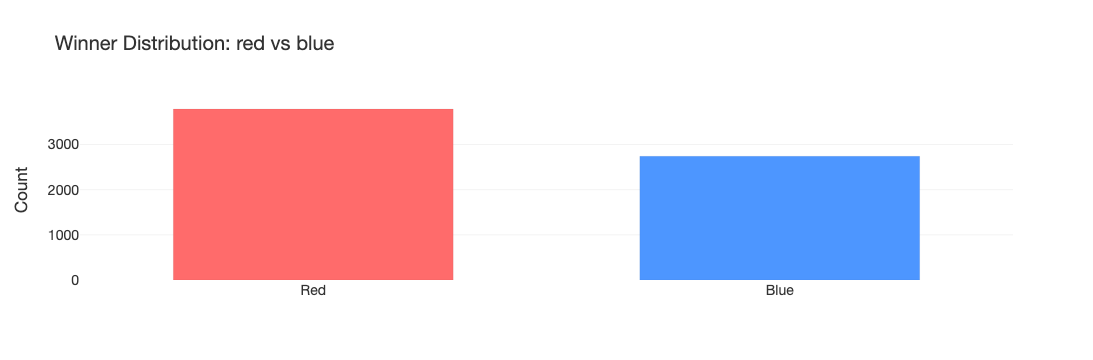

In [24]:
color_map = {'Red': '#FF6B6B', 'Blue': '#4D96FF'}  # pastel red & blue

winner_counts = ufc['Winner'].value_counts().reset_index()
winner_counts.columns = ['Winner', 'Count']

fig = px.bar(winner_counts, x = 'Winner', y = 'Count', color = 'Winner', color_discrete_map = color_map, title = 'Winner Distribution: red vs blue')

fig.update_layout(plot_bgcolor = 'white', paper_bgcolor = 'white', font = dict(family = "Helvetica Neue", size = 14, color = "#333"),
                xaxis = dict(title = ''), yaxis = dict(title = 'Count', gridcolor = 'rgba(0,0,0,0.05)'), title_x = 0.05, showlegend = False, bargap = 0.4)

fig.update_traces(marker_line_width = 0.5, marker_line_color = 'rgba(0,0,0,0.1)')
fig.show()

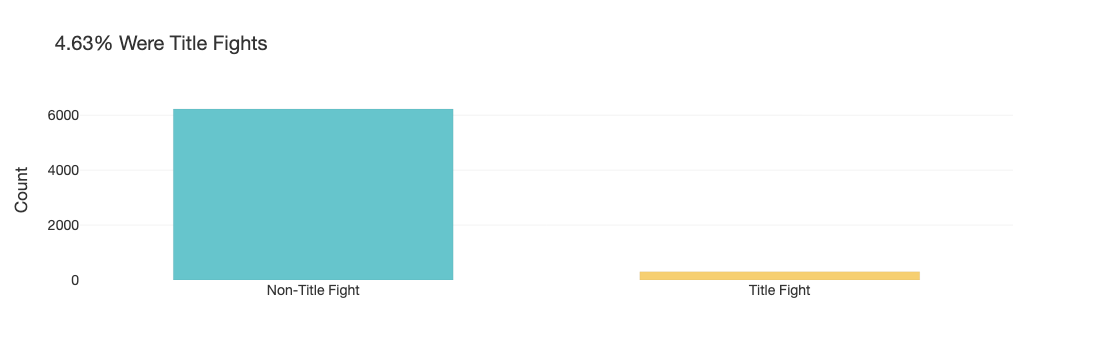

In [37]:
title_counts = ufc['TitleBout'].value_counts().reset_index()
title_counts.columns = ['TitleBout', 'Count']
title_counts['TitleBout'] = title_counts['TitleBout'].map({True: 'Title Fight', False: 'Non-Title Fight'})

total_fights = title_counts['Count'].sum()
title_fight_count = title_counts[title_counts['TitleBout'] == 'Title Fight']['Count'].values[0]
title_ratio = title_fight_count / total_fights * 100

fig = px.bar(title_counts, x = 'TitleBout', y = 'Count',
             color = 'TitleBout', color_discrete_sequence = px.colors.qualitative.Pastel,
             title = f'{title_ratio:.2f}% Were Title Fights')

fig.update_layout(plot_bgcolor = 'white', paper_bgcolor = 'white',
                  font = dict(family = "Helvetica Neue", size = 14, color = "#333"),
                  xaxis = dict(title = ''), yaxis = dict(title = 'Count', gridcolor = 'rgba(0,0,0,0.05)'),
                  title_x = 0.05, showlegend = False, bargap = 0.4)

fig.update_traces(marker_line_width = 0.5, marker_line_color = 'rgba(0,0,0,0.1)')
fig.show()

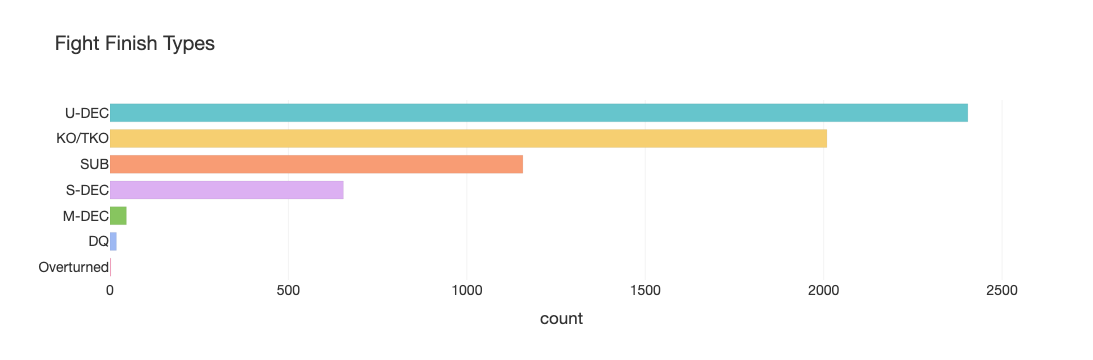

In [22]:
finish_counts = ufc['Finish'].value_counts().reset_index()
finish_counts.columns = ['Finish', 'Count']

fig = px.bar(finish_counts, x = 'Count', y = 'Finish', orientation = 'h',
             color = 'Finish', color_discrete_sequence = px.colors.qualitative.Pastel,
             title = 'Fight Finish Types')

fig.update_layout(plot_bgcolor = 'white', paper_bgcolor = 'white',
                  font = dict(family = "Helvetica Neue", size = 14, color = "#333"),
                  xaxis = dict(title = 'count', gridcolor = 'rgba(0,0,0,0.05)'),
                  yaxis = dict(title = ''), title_x = 0.05, showlegend = False, bargap = 0.3)

fig.update_traces(marker_line_width = 0.5, marker_line_color = 'rgba(0,0,0,0.1)')
fig.show()

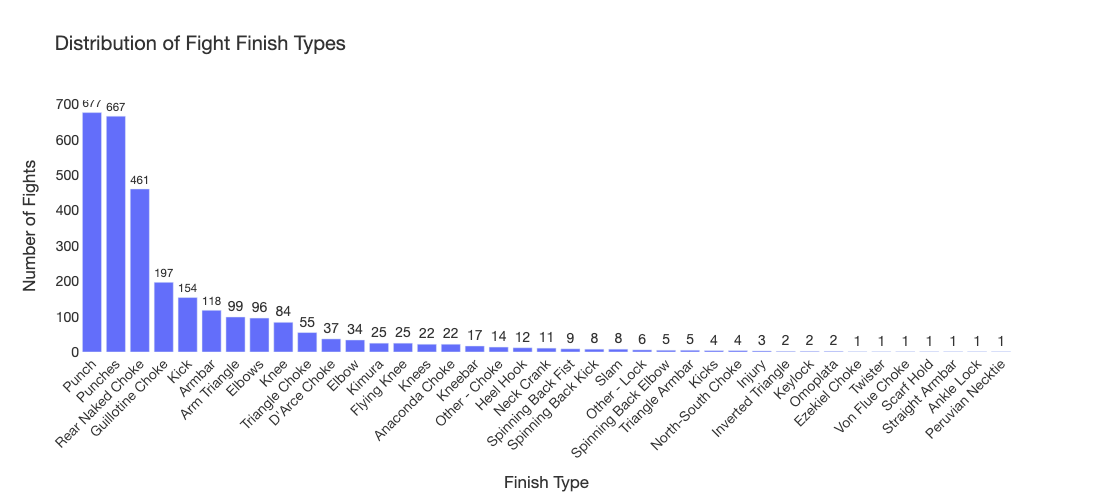

In [86]:
finish_counts = ufc['FinishDetails'].value_counts().reset_index()
finish_counts.columns = ['Finish Type', 'Count']

fig = px.bar(finish_counts, x = 'Finish Type', y = 'Count',
             title = 'Distribution of Fight Finish Types',
             labels = {'Finish Type': 'Finish Type', 'Count': 'Number of Fights'}, text = 'Count')

fig.update_traces(textposition = 'outside')
fig.update_layout(xaxis_tickangle = -45, plot_bgcolor = 'white', paper_bgcolor = 'white',
                  font = dict(family = 'Helvetica Neue', size = 14, color = '#333'), 
                  width = 900, height = 500, title_x = 0.05)
fig.show()

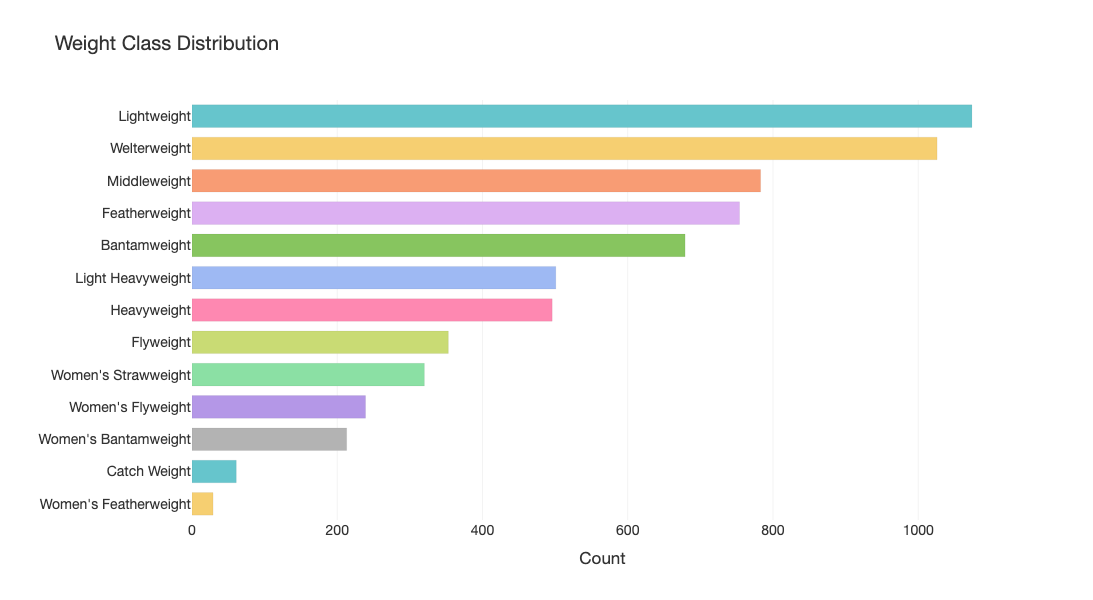

In [38]:
weight_counts = ufc['WeightClass'].value_counts().reset_index()
weight_counts.columns = ['WeightClass', 'Count']

fig = px.bar(weight_counts, x = 'Count', y = 'WeightClass', orientation = 'h',
             color = 'WeightClass', color_discrete_sequence = px.colors.qualitative.Pastel,
             title = 'Weight Class Distribution')

fig.update_layout(plot_bgcolor = 'white', paper_bgcolor = 'white',
                  font = dict(family = "Helvetica Neue", size = 14, color = "#333"),
                  xaxis = dict(title = 'Count', gridcolor = 'rgba(0,0,0,0.05)'),
                  yaxis = dict(title = ''), title_x = 0.05,
                  showlegend = False, bargap = 0.3, height = 600)

fig.update_traces(marker_line_width = 0.5, marker_line_color = 'rgba(0,0,0,0.1)')
fig.show()

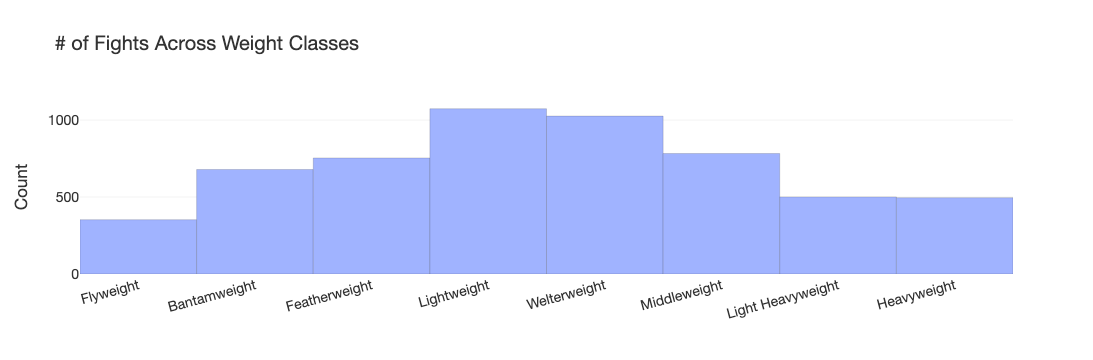

In [50]:
mens_weightclasses = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight',
                'Welterweight', 'Middleweight', 'Light Heavyweight', 'Heavyweight']

# filter + order
mens_df = ufc[ufc['WeightClass'].isin(mens_weightclasses)]
mens_counts = mens_df['WeightClass'].value_counts().reindex(mens_weightclasses).reset_index()
mens_counts.columns = ['WeightClass', 'Count']

fig = px.bar(mens_counts, x = 'WeightClass', y = 'Count',
             color_discrete_sequence = ['#A0B3FF'],
             title = '# of Fights Across Weight Classes')

fig.update_layout(plot_bgcolor = 'white', paper_bgcolor = 'white',
                font = dict(family = "Helvetica Neue", size = 14, color = "#333"),
                xaxis = dict(title = '', tickangle = -15),
                yaxis = dict(title = 'Count', gridcolor = 'rgba(0,0,0,0.05)'),
                title_x = 0.05, showlegend = False, bargap = 0)

fig.update_traces(marker_line_width = 1, marker_line_color = 'rgba(0,0,0,0.15)')
fig.show()

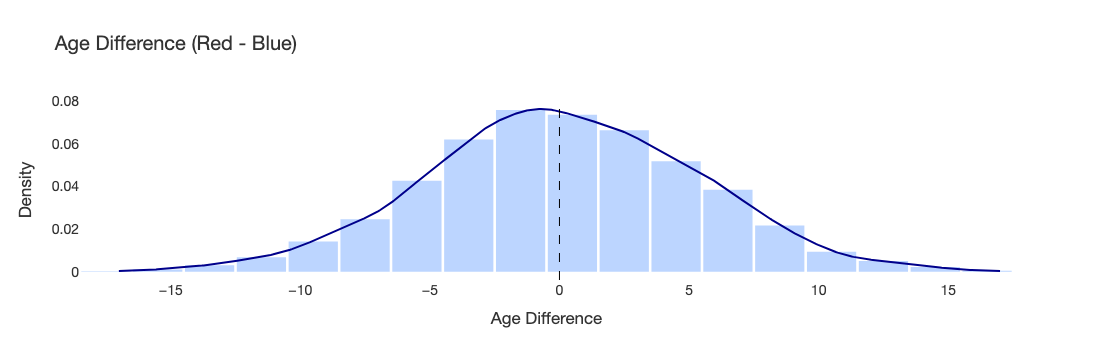

In [59]:
age_diff = ufc['AgeDif'].dropna()

# Calculate KDE
kde = gaussian_kde(age_diff)
x_kde = np.linspace(age_diff.min(), age_diff.max(), 500)
y_kde = kde(x_kde)

fig = go.Figure()

fig.add_trace(go.Histogram(x = age_diff, nbinsx = 30, histnorm = 'probability density',
                           marker_color = '#A0C4FF', opacity = 0.7, name = 'Histogram'))

fig.add_trace(go.Scatter(x = x_kde, y = y_kde, mode = 'lines', line = dict(color = 'darkblue', width = 2), name = 'KDE'))
fig.add_vline(x = 0, line_dash = 'dash', line_color = 'black', line_width = 1)

fig.update_layout(title = 'Age Difference (Red - Blue)', xaxis_title = 'Age Difference', yaxis_title = 'Density',
                  plot_bgcolor = 'white', paper_bgcolor = 'white', font = dict(family = 'Helvetica Neue', size = 14, color = '#333'),
                  bargap = 0.05, title_x = 0.05, showlegend = False)
fig.show()

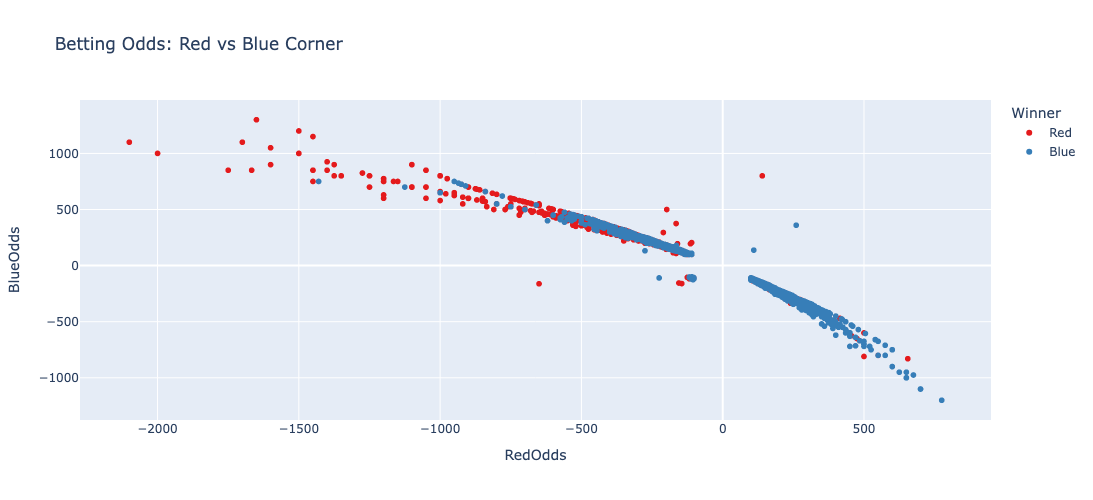

In [76]:
fig = px.scatter(ufc, x = "RedOdds", y = "BlueOdds", color = "Winner", title = "Betting Odds: Red vs Blue Corner",
    color_discrete_sequence = px.colors.qualitative.Set1)

fig.update_layout(width = 700, height = 500)
fig.show()

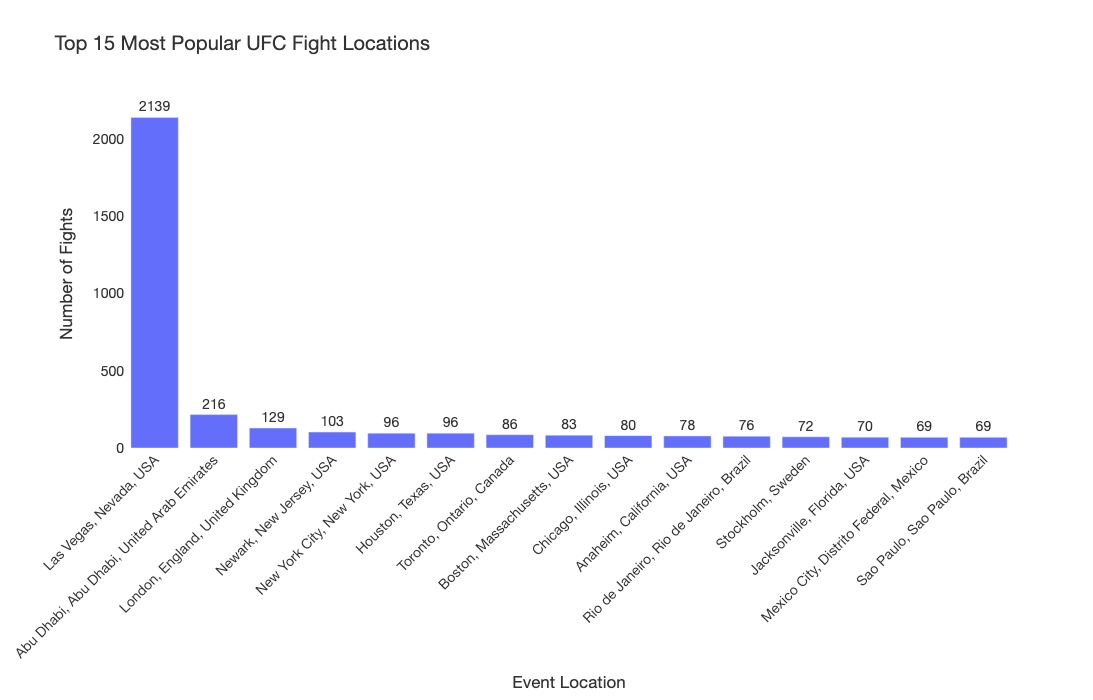

In [92]:
location_counts = ufc['Location'].value_counts().head(15).reset_index()
location_counts.columns = ['Location', 'Number of Fights']

fig = px.bar(location_counts, x = 'Location', y = 'Number of Fights',
             title = 'Top 15 Most Popular UFC Fight Locations',
             labels = {'Location': 'Event Location', 'Number of Fights': 'Number of Fights'},
             text = 'Number of Fights')

fig.update_traces(textposition = 'outside')

fig.update_layout(xaxis_tickangle = -45, plot_bgcolor = 'white', paper_bgcolor = 'white',
                  font = dict(family = 'Helvetica Neue', size = 14, color = '#333'),
                  width = 900, height = 700, title_x = 0.05)

fig.show()